<a href="https://colab.research.google.com/github/yeiscop/PYTHON/blob/master/extended_case_1_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>How can we control the increasing number of accidents in New York?</h1>

In [2]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

![texto alternativo](https://4.bp.blogspot.com/-ImwjGBnN9Yg/VuYgbbaNBJI/AAAAAAAAA_o/rdXnY7x6I8svIEsXRcm51-jrj_Lopdb-w/s1600/E2-U3.png)

http://127.0.0.1:8888/view/work/Bootcamps/3.%2BStatistics%2BFundamentals/Distributions.png

<h2>Introduction</h2>

<p><strong>Business Context.</strong> The city of New York has seen a rise in the number of accidents on the roads in the city. They would like to know if the number of accidents have increased in the last few weeks. For all the reported accidents, they have collected details for each accident and have been maintaining records for the past year and a half (from January 2018 to August 2019). </p>
<p>The city has contracted you to build visualizations that would help them identify patterns in accidents, which would help them take preventive actions to reduce the number of accidents in the future. They have certain parameters like borough, time of day, reason for accident, etc. Which they care about and which they would like to get specific information on.</p>

<p><strong>Business Problem.</strong> Your task is to format the given data and provide visualizations that would answer the specific questions the client has, which are mentioned below.</p>

<p><strong>Analytical Context.</strong> You are given a CSV file (stored in the already created <code>data</code> folder) containing details about each accident like date, time, location of the accident, reason for the accident, types of vehicles involved, injury and death count, etc. The delimiter in the given CSV file is <code>;</code> instead of the default <code>,</code>. You will be performing the following tasks on the data:</p>
<ol>
<li>Extract additional borough data stored in a JSON file</li>
<li>Read, transform, and prepare data for visualization</li>
<li>Perform analytics and construct visualizations of the data to identify patterns in the dataset</li>
</ol>
<p>The client has a specific set of questions they would like to get answers to. You will need to provide visualizations to accompany these:</p>
<ol>
<li>How have the number of accidents fluctuated over the past year and a half? Have they increased over the time?</li>
<li>For any particular day, during which hours are accidents most likely to occur?</li>
<li>Are there more accidents on weekdays than weekends?</li>
<li>What are the accidents count-to-area ratio per borough? Which boroughs have disproportionately large numbers of accidents for their size?</li>
<li>For each borough, during which hours are accidents most likely to occur?</li>
<li>What are the top 5 causes of accidents in the city? </li>
<li>What types of vehicles are most involved in accidents per borough?</li>
<li>What types of vehicles are most involved in deaths?</li>
</ol>

<h2>Fetching the relevant data</h2>

<p>The client has requested analysis of the accidents-to-area ratio for boroughs. Borough data is stored in a JSON file in the <code>data</code> folder.</p>

<h3>Question :</h3>
<p>Use the function <code>json.load()</code> to load the file <code>borough_data.json</code> as a dictionary.</p>

**Answer.**

In [3]:
json_load = open(r"borough_data.json")
borough = json.load(json_load)
type(borough), borough

(dict,
 {'brooklyn': {'area': 70.82, 'name': 'brooklyn', 'population': 2648771.0},
  'manhattan': {'area': 22.83, 'name': 'manhattan', 'population': 1664727.0},
  'queens': {'area': 108.53, 'name': 'queens', 'population': 2358582.0},
  'staten island': {'area': 58.37,
   'name': 'staten island',
   'population': 479458.0},
  'the bronx': {'area': 42.1, 'name': 'the bronx', 'population': 1471160.0}})

-------

<h3>Question :</h3>
<p>Similarly, use the pandas function <code>read_csv()</code> to load the file <code>accidents.csv</code> as a DataFrame. Name this DataFrame <code>df</code>. </p>

**Answer.**

In [12]:
df = pd.read_csv("accidents.csv", sep=';', error_bad_lines=False)
df.shape

b'Skipping line 12388: expected 24 fields, saw 26\nSkipping line 18544: expected 24 fields, saw 27\nSkipping line 24727: expected 24 fields, saw 34\n'
b'Skipping line 37030: expected 24 fields, saw 32\nSkipping line 55418: expected 24 fields, saw 37\n'
b'Skipping line 73853: expected 24 fields, saw 32\nSkipping line 86190: expected 24 fields, saw 31\n'
b'Skipping line 104714: expected 24 fields, saw 25\nSkipping line 117023: expected 24 fields, saw 38\nSkipping line 129321: expected 24 fields, saw 37\n'
b'Skipping line 135482: expected 24 fields, saw 30\nSkipping line 147787: expected 24 fields, saw 31\nSkipping line 160062: expected 24 fields, saw 32\n'
b'Skipping line 178478: expected 24 fields, saw 27\nSkipping line 190811: expected 24 fields, saw 26\n'
b'Skipping line 196975: expected 24 fields, saw 32\nSkipping line 209250: expected 24 fields, saw 35\nSkipping line 221538: expected 24 fields, saw 36\nSkipping line 227699: expected 24 fields, saw 31\n'
b'Skipping line 239997: expec

(427768, 24)

In [8]:
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454,40.809,-73.911316,NaN,0,0.0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236,40.636,-73.91251,FLATLANDS AVENUE,1,0.0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101,40.7555,-73.93953,NaN,0,0.0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367,NaN,NaN,MAIN STREET,0,0.0,1,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468,40.8683,-73.90127,NaN,0,0.0,0,0,1,0,View Obstructed/Limited,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


-------

<h2>Overview of the data</h2>

<p>Let's go through the columns present in the dataframe:</p>

In [13]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

<p>We have the following columns</p>
<ol>
<li><strong>BOROUGH</strong>: The borough in which the accident occured</li>
<li><strong>COLLISION_ID</strong>: A unique identifier for this collision</li>
<li><strong>CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)</strong>: Reasons for the accident</li>
<li><strong>CROSS STREET NAME</strong>: Nearest cross street to the place of accidents</li>
<li><strong>DATE</strong>: Date of the accident</li>
<li><strong>TIME</strong>: Time of accident</li>
<li><strong>LATITUDE</strong>: Latitude of the accident</li>
<li><strong>LONGITUDE</strong>: Longitude of the accident</li>
<li><strong>NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED</strong>: Category wise injury</li>
<li><strong>NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) KILLED</strong>: Category wise death</li>
<li><strong>ON STREET NAME</strong>: Street where the accident occured</li>
<li><strong>VEHICLE TYPE CODE (1, 2, 3, 4, 5)</strong>: Types of vehicles involved in the accident</li>
<li><strong>ZIP CODE</strong>: zip code of the accident location</li>
</ol>

<h3>Exercise 1 [5 min]:</h3>
<p>Since 2014, New York City has been implementing a road safety plan named <a href="https://www1.nyc.gov/content/visionzero/pages/">Vision Zero</a>. It aims to reduce the number of traffic deaths to <em>zero</em> by the end of 2024. The plan is creating new and enhancing current safety measures, some of these include:</p>
<ul>
<li>[ ] Automated pedestrian detection</li>
<li>[ ] Road safety audits at high risk locations</li>
<li>[ ] Expansion in the cycle track network</li>
<li>[ ] Targeted education and awareness initiatives</li>
<li>[ ] Creation of pedestrian refuge islands</li>
<li>[ ] Launch Integrated Data-Driven Speed Reducer Program (speed humps &amp; speed cushions)</li>
</ul>
<p>Which of these initiatives could directly benefit from an analysis of the data provided? Check all that apply.</p>
<p><strong>Note:</strong> You can create check marks by double-clicking this cell and adding an <code>[x]</code> in the corresponding lines. </p>

**Answer.**

<ul>
<li>[ ] Automated pedestrian detection</li>
<li>[ ] Road safety audits at high risk locations</li>
<li>[ ] Expansion in the cycle track network</li>
<li>[ ] Targeted education and awareness initiatives</li>
<li>[ ] Creation of pedestrian refuge islands</li>
<li>[ ] Launch Integrated Data-Driven Speed Reducer Program (speed humps &amp; speed cushions)</li>
</ul>

<p>Let's go ahead and answer each of the client's questions.</p>

<h2>Answering the client's questions</h2>

<h3>Exercise 2 [10 min]:</h3>
<p>Group the available data on a monthly basis and generate a line plot of accidents over time. Has the number of accidents increased over the past year and a half?</p>
<p><strong>Hint</strong>: You may find the pandas functions <code>to_datetime()</code> and <code>dt.to_period()</code> useful.</p>

**Answer.**

In [17]:
df['date'] = pd.to_datetime(df['DATE'], errors='coerce')
df.date.head(), df.DATE.head()

(0   2018-09-26
 1   2018-09-25
 2   2019-08-22
 3   2018-09-23
 4   2019-08-20
 Name: date, dtype: datetime64[ns], 0    09/26/2018
 1    09/25/2018
 2    08/22/2019
 3    09/23/2018
 4    08/20/2019
 Name: DATE, dtype: object)

In [41]:
serie = df.groupby(df['date'].dt.to_period('M'))['DATE'].count()
serie

date
2018-01    23469
2018-02    20790
2018-03    25037
2018-04    23357
2018-05    26871
2018-06    26628
2018-07    25489
2018-08    19528
2018-09    13945
2018-10    26667
2018-11    24894
2018-12    24957
2019-01    21995
2019-02    20620
2019-03    22961
2019-04    21663
2019-05    25265
2019-06    13150
2019-07    12013
2019-08     8466
Freq: M, Name: DATE, dtype: int64

In [42]:
serie_data_frame = pd.DataFrame(serie)
serie_data_frame.index, serie_data_frame.columns

(PeriodIndex(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
              '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
              '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
              '2019-07', '2019-08'],
             dtype='period[M]', name='date', freq='M'),
 Index(['DATE'], dtype='object'))

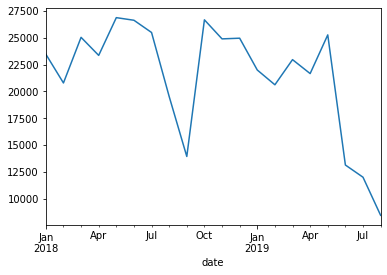

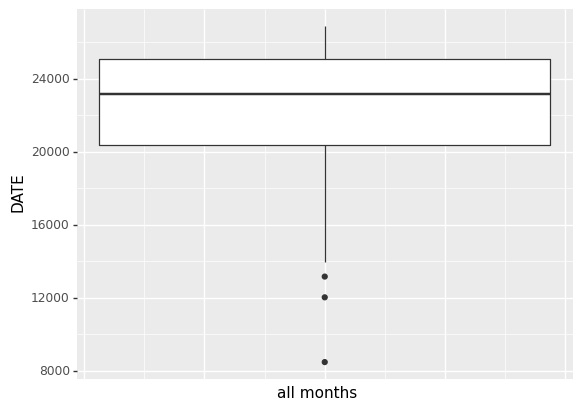

<ggplot: (-9223363252079360424)>

* Grafique la serie
* Agrupe por año
* Medidas descriptivas de la serie

<h3>Exercise 3 [5 min]:</h3>
<p>From the plot above, which months seem to have the least number of accidents? What do you think are the reasons behind this?</p>

**Answer.**

<h3>Exercise 4 :</h3>
<p>How does the number of accidents vary throughout a single day? Create a new column <code>HOUR</code> based on the data from the <code>TIME</code> column, then plot a bar graph of the distribution per hour throughout the day.</p>
<p><strong>Hint:</strong> You may find the function <code>dt.hour</code> useful. </p>

**Answer.**

<p>From this, we see that more accidents occur in the afternoon (2 - 6 PM) than at other times of day.</p>

In [30]:
df.TIME.head()

0    12:12
1    16:30
2    19:30
3    13:10
4    22:40
Name: TIME, dtype: object

In [33]:
df['time'] =pd.to_datetime(df['TIME'], errors='coerce')
df.time.head()

0   2020-09-02 12:12:00
1   2020-09-02 16:30:00
2   2020-09-02 19:30:00
3   2020-09-02 13:10:00
4   2020-09-02 22:40:00
Name: time, dtype: datetime64[ns]

In [35]:
df["HOUR"] = df.time.dt.hour
df.HOUR

0         12.0
1         16.0
2         19.0
3         13.0
4         22.0
          ... 
427763    15.0
427764    14.0
427765    13.0
427766    17.0
427767    16.0
Name: HOUR, Length: 427768, dtype: float64

* Grafica por clase

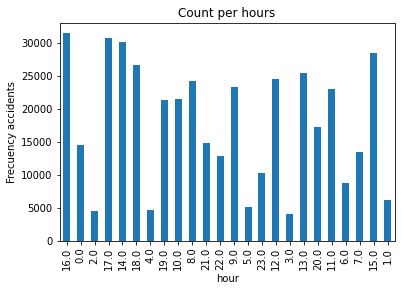

In [38]:
#Graficas por clases


In [ ]:
count_classes = pd.value_counts(df.HOUR, sort = True)
count_classes

16    17536
17    17209
14    16889
15    15886
18    14899
13    14224
12    13731
8     13403
9     12939
11    12815
10    11981
19    11885
20     9597
21     8330
0      8160
7      7399
22     7216
23     5807
6      4844
1      3460
5      2878
2      2570
4      2562
3      2302
Name: HOUR, dtype: int64

<h3>Exercise 5 :</h3>
<p>In the above question we have aggregated the number accidents per hour disregarding the date and place of ocurrence. Which criticism would you give to this approach?</p>

**Answer.**

-------
* The hour factor is important, but by itself it can lead to misinterpretation. Crossing the day of the week can indicate which are the days with the highest frequency of accidents per hour; The hours of a Sunday are not the same as those of a Friday; In addition, it can be said which days it has similar behavior. <br/>

* Making another category or table crossed between place and time can indicate us spaces with the highest frequency of accidents in an hour to determine and that if it can be used to take preventive measures and if we add the day to that, the qualitative summary of the data would be substantially improved.

<h3>Exercise 6 :</h3>
<p>How does the number of accidents vary throughout a single week? Plot a bar graph based on the accidents count by day of the week.</p>
<p><strong>Hint:</strong> You may find the function <code>dt.weekday</code> useful.</p>

**Answer.**

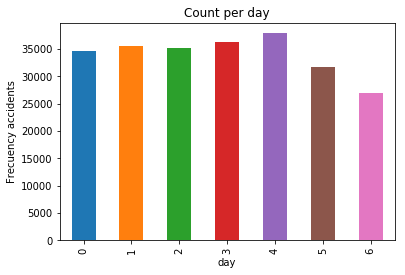

In [ ]:
df["day"] = df.date.dt.weekday


In [ ]:
count_classes = pd.value_counts(df.day, sort = True)
count_classes

4    37886
3    36254
1    35651
2    35188
0    34719
5    31784
6    27040
Name: day, dtype: int64

In [ ]:
preserved_mapper = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['day_1'] =df.day.replace(preserved_mapper)
df = df.sort_values('day')
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,date,time,HOUR,day,day_1
180048,05/07/2018,17:30,MANHATTAN,10018.0,40.757732,-73.99686,10 AVENUE,0,0,0,...,Station Wagon/Sport Utility Vehicle,Box Truck,NaN,NaN,NaN,2018-05-07,2020-09-01 17:30:00,17,0,Mon
193140,05/21/2018,11:30,QUEENS,11375.0,40.715523,-73.84236,ASCAN AVENUE,0,0,0,...,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,2018-05-21,2020-09-01 11:30:00,11,0,Mon
103078,02/18/2019,4:46,BROOKLYN,11237.0,40.712963,-73.92761,MEADOW STREET,0,0,0,...,Sedan,NaN,NaN,NaN,NaN,2019-02-18,2020-09-01 04:46:00,4,0,Mon
29044,07/08/2019,8:30,MANHATTAN,10028.0,40.779540,-73.95978,EAST 84 STREET,0,0,0,...,Taxi,Taxi,NaN,NaN,NaN,2019-07-08,2020-09-01 08:30:00,8,0,Mon
29045,06/10/2019,0:00,BRONX,10455.0,40.812283,-73.90447,EAST 149 STREET,0,0,0,...,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2019-06-10,2020-09-01 00:00:00,0,0,Mon


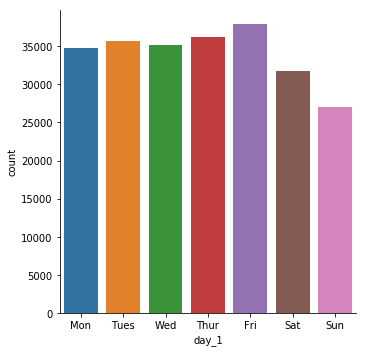

In [ ]:
sns.catplot(x = "day_1", data = df, kind = "count");

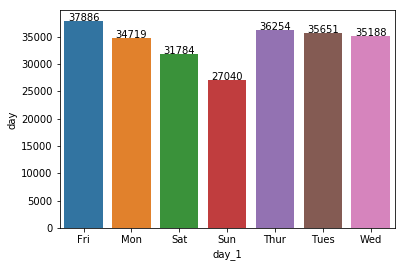

In [ ]:
groupedvalues = df.groupby('day_1').count().reset_index()
g= sns.barplot(x = 'day_1', y = 'day', data = groupedvalues)
for index, row in groupedvalues.iterrows():
    g.text(row.name, row.day - 16, round(row.day, 2), color = 'black', ha = "center")

<h3>Exercise 7 :</h3>
<p>Plot a bar graph of the total number of accidents in each borough, as well as one of the accidents per square mile per borough. What can you conclude?</p>
<p><strong>Hint:</strong> You may want to update some of the keys in the borough dictionary to match the names in the dataframe. </p>

**Answer.**

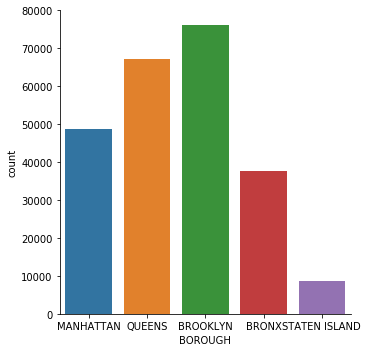

In [ ]:
sns.catplot(x = "BOROUGH", data = df, kind = "count");

In [ ]:
pd.value_counts(df.BOROUGH, sort = True)

BROOKLYN         76253
QUEENS           67120
MANHATTAN        48749
BRONX            37709
STATEN ISLAND     8691
Name: BOROUGH, dtype: int64

In [ ]:
sns.catplot(x = "day_1", data = df, kind = "count");

In [ ]:
borough

{'the bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
 'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'staten island': {'name': 'staten island',
  'population': 479458.0,
  'area': 58.37}}

<h3>Exercise 8 :</h3>
<p>Which hours have the most accidents for each borough? Plot a bar graph for each borough showing the number of accidents for each hour of the day.</p>
<p><strong>Hint:</strong> You can use <code>sns.FacetGrid</code> to create a grid of plots with the hourly data of each borough. </p>

**Answer.**

-------

<p><strong>Is the number of accidents higher at different times in different boroughs? Should we concentrate at different times for each borough?</strong></p>

<p>We can see that in all the boroughs the accident count is highest from approximately 2 - 6PM. But in Manhattan and the Bronx, you can see that there is not as much of a relative increase during these hours as in Brooklyn or Queens. Additionally, Staten Island has the lowest overall number of accidents.</p>

<h3>Exercise 9 :</h3>
<p>What factors cause the most accidents? Avoid double counting the contributing factors of a single accident. </p>
<p><strong>Hint:</strong> One way of dealing with repetitions is to concatenate the corresponding columns while preserving their indexes, you can do that with the functions <code>pd.concat()</code> and  <code>reset_index()</code>. Then, use an appropiate <code>group_by</code> to count the number of repetitions of contributed factors per accident.   </p>

**Answer.**

-------

<h3>Exercise 10 :</h3>
<p>Which vehicle types are most involved in accidents per borough? Avoid double counting the type of vehicles present in a single accident. </p>
<p><strong>Hint:</strong> You can apply a similar approach to the one used in the previous question.</p>

**Answer.**

-------

<h3>Exercise 11 :</h3>
<p>In a 2018 <a href="https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html">interview</a> with The New York Times, New York's mayor de Blasio stated that <em>'Vision Zero is clearly working'</em>. That year, the number of deaths in traffic accidents in NYC dropped to a historical 202. Yet, as reported by <a href="https://www.amny.com/news/vision-zero-de-blasio-1-30707464/">am New York Metro</a>, the number of fatalities has increased by 30% in the first quarter of 2019 compared to the previous year and the number of pedestrians and cyclist injured has not seen any improvement.</p>
<p>How would you use the provided data to understand what went wrong in the first quarter of 2019?</p>
<blockquote>
<ul>
<li>
<p>[ ] Consider the accidents of the first quarter of 2019. Then, check for the most common causes of accidents where pedestrians and cyclists were involved. Give a recommendation based solely on this information. </p>
</li>
<li>
<p>[ ] Create a pair of heatmaps of the accidents involving injured/killed pedestrians and cyclists in the first quarter of 2018 and 2019. Compare these two to see if there is any change in the concentration of accidents. In critical areas, study the type of factors involved in the accidents. Give a recommendation to visit these areas to study the problem further.    </p>
</li>
<li>
<p>[ ] The provided data is insufficient to improve our understanding of the situation.</p>
</li>
<li>
<p>[ ] None of the above. I would do the following: <em>here your recommended answer</em>.</p>
</li>
</ul>
</blockquote>

**Answer.**

-------

<h3>Exercise 12 :</h3>
<p>Calculate the number of deaths caused by each type of vehicle. Plot a bar chart for the top 5 vehicles. Which vehicles are most often involved in deaths, and by how much more than the others?</p>
<p><strong>For example,</strong> if two people died at an accident where 5 vehicles were involved: 4 are PASSENGER VEHICLE and 1 is a SPORT UTILITY/STATION WAGON. Then, we would add two deaths to each PASSENGER VEHICLE and SPORT UTILITY/STATION WAGON types.</p>
<p><strong>Hint:</strong> You may want to create a new column with the total number of kills in the accident. For that you may find the function <code>.to_numpy()</code> useful. Then, proceed as the previous excercises to avoid double-counting the type of vehicles. </p>

**Answer.**

-------